In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import itertools
import seaborn as sns
import pandas as pd
import copy
%matplotlib notebook

In [2]:
# with open('./std_baseline_k0_j3_stats.pickle', 'wb') as f:
#     pickle.dump({'acc': accuracies, 'ood': ood_stats, 'holdout_groups': holdout_groups}, f)
data = pickle.load(open("./std_baseline_k0_j3_stats.pickle", 'rb'))
# adv_data = pickle.load(open("./advOE_baseline_k0_j3_stats.pickle", 'rb'))
# adv_data2 = pickle.load(open("./advOE_baseline_k0_j3_stats2.pickle", 'rb'))
# adv_data2 = pickle.load(open("./advOE_baseline_k0_j3_stats_long.pickle", 'rb'))
# adv_data2 = pickle.load(open("./advOE_baseline_k0_j3_stats_long2.pickle", 'rb'))
adv_datatot = pickle.load(open("./advOE_baseline_k0_j3_stats_tot.pickle", 'rb'))
adv_data_gp3dp3 = pickle.load(open("./advOE_baseline_k0_j3_stats_dropP3_GausP3_LmbP5_run0.pickle", 'rb'))
# ohom_data = pickle.load(open("./advOE_OHOM_baseline_k0_j3_stats.pickle", 'rb'))
# ohom_data2 = pickle.load(open("./advOE_OHOM_baseline_k0_j3_stats_2.pickle", 'rb'))
# ohom_data2 = pickle.load(open("./advOE_OHOM_baseline_k0_j3_stats_running.pickle", 'rb'))
ohom_datatot = pickle.load(open("./advOE_OHOM_baseline_k0_j3_stats_tot.pickle", 'rb'))

In [3]:
accuracies, ood_stats, holdout_groups, times = \
    data['acc'], data['ood'], data['holdout_groups'], data['time']
adv_accuracies, adv_ood_stats, adv_holdout_groups, adv_time = \
    adv_datatot['acc'], adv_datatot['ood'], adv_datatot['holdout_groups'], adv_datatot['time']
adv_accuracies_gp3dp3, adv_ood_stats_gp3dp3, adv_holdout_groups_gp3dp3, adv_time_gp3dp3 = \
    adv_data_gp3dp3['acc'], adv_data_gp3dp3['ood'], \
    adv_data_gp3dp3['holdout_groups'], adv_data_gp3dp3['time']
# adv_accuracies2, adv_ood_stats2, adv_holdout_groups2, adv_time2 = \
#     adv_data2['acc'], adv_data2['ood'], adv_data2['holdout_groups'], adv_data2['time']
ohom_accuracies, ohom_ood_stats, ohom_holdout_groups, ohom_time = \
    ohom_datatot['acc'], ohom_datatot['ood'], ohom_datatot['holdout_groups'], ohom_datatot['time']
# ohom_accuracies2, ohom_ood_stats2, ohom_holdout_groups2, ohom_time2 = \
#     ohom_data2['acc'], ohom_data2['ood'], ohom_data2['holdout_groups'], ohom_data2['time']

In [4]:
def remove_empties(data_accs, data_oods, data_holdouts, data_times):
    time = {k:v for (k,v) in data_times.items() if len(v)>0}
    oods = {k:copy.deepcopy(v) for (k,v) in data_oods.items()
                               if len(v['baseline']['holdout']['auroc'])>0}
    accs = {k:v for (k,v) in data_accs.items() if len(v)>0 }
    hlds = data_holdouts[:len(accs)]

In [5]:
display(adv_accuracies)
display(adv_ood_stats)
display(adv_holdout_groups)
display(adv_time)

{0: [0.8390501319261213,
  0.7994722955145118,
  0.8337730870712401,
  0.8443271767810027,
  0.8601583113456465],
 1: [0.7566844919786097,
  0.7967914438502673,
  0.7272727272727273,
  0.7219251336898396,
  0.7112299465240641],
 2: [0.9298701298701298,
  0.922077922077922,
  0.9116883116883117,
  0.9168831168831169,
  0.9324675324675324],
 3: [0.9157608695652174,
  0.9211956521739131,
  0.904891304347826,
  0.9320652173913043,
  0.8994565217391305],
 4: [0.810880829015544,
  0.8264248704663213,
  0.8238341968911918,
  0.8160621761658031,
  0.7927461139896373],
 5: [0.8272251308900523,
  0.8638743455497382,
  0.837696335078534,
  0.8298429319371727,
  0.8167539267015707],
 6: [0.8657894736842106,
  0.9052631578947369,
  0.8842105263157894,
  0.881578947368421,
  0.8894736842105263],
 7: [0.8856382978723404,
  0.9175531914893617,
  0.8829787234042553,
  0.9095744680851063,
  0.8882978723404256],
 8: [0.819371727748691,
  0.8507853403141361,
  0.8429319371727748,
  0.8952879581151832,
  0

{0: {'baseline': {'ID': defaultdict(list, {}),
   'holdout': defaultdict(list,
               {'auroc': [0.5972295514511874,
                 0.6917711081794196,
                 0.5942612137203167,
                 0.6476583113456464,
                 0.6084597625329816],
                'tnr': [0.025000000000000022,
                 0.13749999999999996,
                 0.0,
                 0.11875000000000002,
                 0.08750000000000002],
                'dtacc': [0.5996372031662269,
                 0.6511543535620054,
                 0.6353232189973615,
                 0.6188654353562004,
                 0.5996866754617414]})},
  'odin': {'ID': defaultdict(list, {}),
   'holdout': defaultdict(list,
               {'auroc': [0.6098120052770448,
                 0.6933377308707125,
                 0.6034300791556728,
                 0.6496701846965699,
                 0.6144459102902375],
                'tnr': [0.025000000000000022,
                 0.1500000000000

[(2, 6, 9),
 (6, 7, 8),
 (1, 2, 5),
 (0, 6, 7),
 (2, 3, 4),
 (3, 5, 6),
 (1, 2, 9),
 (1, 6, 9),
 (1, 6, 8),
 (4, 6, 9),
 (3, 6, 8),
 (6, 8, 9),
 (3, 6, 9),
 (1, 2, 6),
 (0, 2, 6),
 (1, 7, 8),
 (0, 1, 9),
 (1, 4, 9),
 (1, 4, 6),
 (1, 8, 9),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 9),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 7),
 (1, 2, 8),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 3, 7),
 (1, 3, 8),
 (1, 3, 9),
 (1, 4, 5),
 (1, 4, 7),
 (1, 4, 8),
 (1, 5, 6),
 (1, 5, 7),
 (1, 5, 8),
 (1, 5, 9),
 (1, 6, 7),
 (1, 7, 9),
 (2, 3, 5),
 (2, 3, 6),
 (2, 3, 7),
 (2, 3, 8),
 (2, 3, 9),
 (2, 4, 5),
 (2, 4, 6),
 (2, 4, 7),
 (2, 4, 8),
 (2, 4, 9),
 (2, 5, 6),
 (2,

{0: [419.6635413169861,
  417.62983798980713,
  415.89638686180115,
  425.85245418548584,
  422.2780122756958],
 1: [414.3339591026306,
  413.3379807472229,
  412.6459765434265,
  413.3350775241852,
  412.8031041622162],
 2: [427.5431864261627,
  428.106326341629,
  427.5163514614105,
  427.76511883735657,
  427.67969822883606],
 3: [347.614727973938,
  347.66041231155396,
  347.64443731307983,
  347.8757629394531,
  347.71713519096375],
 4: [422.8625257015228,
  423.89135456085205,
  424.2171034812927,
  424.095516204834,
  423.86386489868164],
 5: [417.0273907184601,
  417.2034013271332,
  417.30706000328064,
  416.24616599082947,
  416.7417459487915],
 6: [415.7876205444336,
  416.3214964866638,
  416.3644599914551,
  416.43617510795593,
  415.96878814697266],
 7: [410.1582486629486,
  410.6640360355377,
  409.948543548584,
  410.05151081085205,
  410.2998857498169],
 8: [421.96291399002075,
  422.2120487689972,
  422.353298664093,
  422.4507050514221,
  422.2748348712921],
 9: [406

In [6]:
def join_data(data1_accuracies, data1_ood_stats, data1_holdout_groups, data1_time,
              data2_accuracies, data2_ood_stats, data2_holdout_groups, data2_time,
             ):
    accs = copy.deepcopy(data1_accuracies)
    ood_stats = copy.deepcopy(data1_ood_stats)
    hgroups = copy.deepcopy(data1_holdout_groups)
    times = copy.deepcopy(data1_time)
    
    accs = {i:v for i,v in enumerate(accs.values())}
    ood_stats = {i:v for i,v in enumerate(ood_stats.values())}
    times = {i:v for i,v in enumerate(times.values())}
    
    accs2 = copy.deepcopy(data2_accuracies)
    ood_stats2 = copy.deepcopy(data2_ood_stats)
    hgroups2 = copy.deepcopy(data2_holdout_groups)
    times2 = copy.deepcopy(data2_time)
    
    accs2 = {i:v for i,v in enumerate(accs2.values())}
    ood_stats2 = {i:v for i,v in enumerate(ood_stats2.values())}
    times2 = {i:v for i,v in enumerate(times2.values())}
    
    offset = len(accs)
    hgroups.extend(hgroups2)
    for k,v in times2.items():
        times[k+offset] = v
        
    for k,v in accs2.items():
        accs[k+offset] = v
        
    for k,v in ood_stats2.items():
        ood_stats[k+offset] = v
    return accs, ood_stats, hgroups, times

In [6]:
# results = join_data(
#     adv_accuracies, adv_ood_stats, adv_holdout_groups, adv_time,
#     adv_accuracies2, adv_ood_stats2, adv_holdout_groups2, adv_time2,
# )
# adv_accuracies_tot, adv_ood_stats_tot, adv_holdout_groups_tot, adv_time_tot = results

In [9]:
# with open('./advOE_baseline_k0_j3_stats_tot.pickle', 'wb') as f:
#     pickle.dump({'acc': adv_accuracies_tot, 'ood': adv_ood_stats_tot,
#                  'holdout_groups': adv_holdout_groups_tot, 'time': adv_time_tot}, f)

In [63]:
# with open('./advOE_OHOM_baseline_k0_j3_stats_tot.pickle', 'wb') as f:
#     pickle.dump({'acc': ohom_accuracies_tot, 'ood': ohom_ood_stats_tot,
#                  'holdout_groups': ohom_holdout_groups_tot, 'time': ohom_time_tot}, f)

In [50]:
# with open("./advOE_baseline_k0_j3_stats_dropP3_GausP3_LmbP5_run0.pickle", 'wb') as f:
#     pickle.dump({'acc': accs, 'ood': oods,
#                  'holdout_groups': adv_holdout_groups_gp3dp3, 'time': time}, f)

In [7]:
accs = []
aurocs_base = []
aurocs_odin = []
aurocs_odinipp = []
aurocs_mahala = []
aurocs_mahalaipp = []
for hld in ood_stats:
    accs.append(np.array(accuracies[hld]).mean())
    aurocs_base.append(np.array(ood_stats[hld]['baseline']['holdout']['auroc']).mean())
    aurocs_odin.append(np.array(ood_stats[hld]['odin']['holdout']['auroc']).mean())
    aurocs_odinipp.append(np.array(ood_stats[hld]['odin_ipp']['holdout']['auroc']).mean())
    aurocs_mahala.append(np.array(ood_stats[hld]['mahala']['holdout']['auroc']).mean())
    aurocs_mahalaipp.append(np.array(ood_stats[hld]['mahala_ipp']['holdout']['auroc']).mean())

aurocs_base = np.array(aurocs_base)
aurocs_odin = np.array(aurocs_odin)
aurocs_odinipp = np.array(aurocs_odinipp)
aurocs_mahala = np.array(aurocs_mahala)
aurocs_mahalaipp = np.array(aurocs_mahalaipp)

<IPython.core.display.Javascript object>


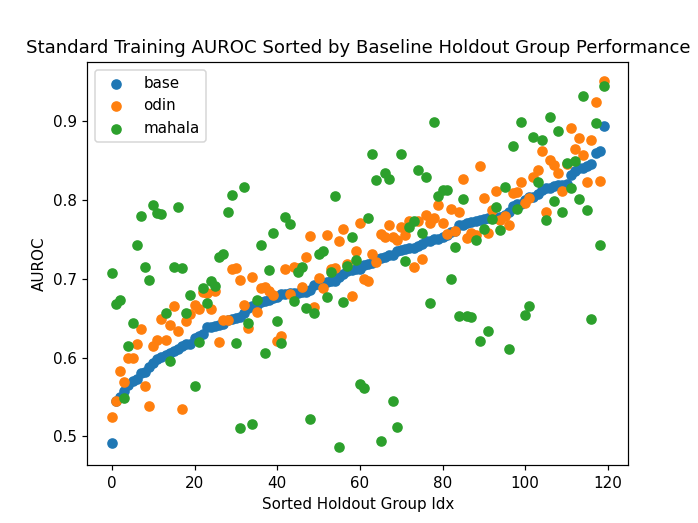

[ 81 116  95 106 118  96  11  66  59  60  39  50  45  53  74  69  80  42
  47  94  99 117  86  84 105  17  61  31  58  71  88 109  79  14  97  32
  82 103  22  41   7  63  78 113  46  68 104  83 119  48  92  52 107  67
   4  89  93  30  57 115  98  62  56  38  37 108  77   0  33  35  65  13
  43  40  10  51  36  19 111  44  76  49  91  12 114  73  20  25  28  87
   8  18  16   1   6  55   5   3   9  54  34  24 112 102  70  29 110  72
  26  21 101  64   2  85  75  27  15  90  23 100]
[0.49222625 0.5445017  0.55040838 0.55831545 0.565233   0.57088123
 0.5734004  0.58079176 0.58220896 0.58844472 0.59262945 0.59808299
 0.60019415 0.60376583 0.60565303 0.60813316 0.61139484 0.61483615
 0.61735887 0.61752195 0.62540011 0.62803521 0.63053323 0.6383383
 0.63905445 0.64050496 0.64155447 0.64314058 0.64830011 0.64897513
 0.64973221 0.65214071 0.65696041 0.66334144 0.66603577 0.66692787
 0.67040323 0.67188943 0.67304715 0.67531579 0.67691888 0.68100337
 0.68116425 0.68155242 0.68168646 0.68230994

In [8]:
auroc_idxs = aurocs_base.argsort()
fig = plt.figure()
print(auroc_idxs)
print(aurocs_base[auroc_idxs])
# plt.scatter(np.arange(len(accs)), np.array(accs)[auroc_idxs])
plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_base[auroc_idxs])
plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_odin[auroc_idxs])
# plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_odinipp[auroc_idxs])
plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_mahala[auroc_idxs])
# plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_mahalaipp[auroc_idxs])
# plt.legend(['base', 'odin', 'odin ipp', 'mahala', 'mahala ipp'])
plt.legend(['base', 'odin', 'mahala'])
plt.ylabel("AUROC")
plt.xlabel("Sorted Holdout Group Idx")
plt.title("Standard Training AUROC Sorted by Baseline Holdout Group Performance")
plt.show()

<IPython.core.display.Javascript object>


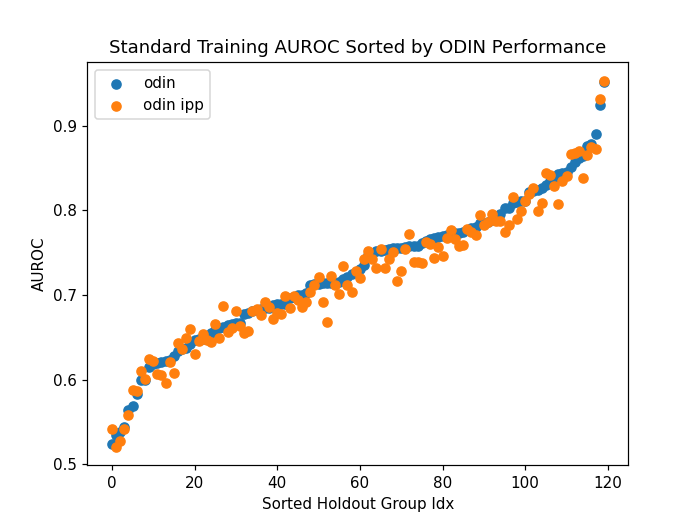

[ 81  42  60 116  59 106  95 118  96  39  11  61   7  53  50  63  80  66
  14  74  47  31  58  45  94  32 105 117  48  69  79  99  57  41 113  84
  86  17  22  52  82 104 103  56 109  62  92  97  67  71  78  68  88   4
  40  46  30  37  51  83  38 115  89  35  20  77  33 119  28 107  13  49
 108  18  25  12  93  65   0   5  19  98  76  10  43   6 111  55  36 114
  29  16  91  44  34  24   8   3   9   1  21  27  54  23  73 112  26 102
  87  72 101 110  75  70   2  15  85  64  90 100]
[0.52444921 0.53489242 0.53851978 0.54460541 0.56404442 0.56918049
 0.58345384 0.59918744 0.59930249 0.61503795 0.61791557 0.61924228
 0.62077076 0.62195862 0.62294428 0.6279235  0.63372913 0.63617461
 0.63781235 0.64171504 0.64703293 0.64801919 0.64802787 0.64894557
 0.65561301 0.65844555 0.66122463 0.66193745 0.66419534 0.6652613
 0.66669286 0.66704131 0.67802506 0.67913915 0.68108248 0.68211519
 0.6833161  0.68440253 0.68508293 0.68778804 0.68885603 0.68948286
 0.68972683 0.69691866 0.69783971 0.70003826

In [10]:
auroc_idxs = aurocs_odin.argsort()
fig = plt.figure()
print(auroc_idxs)
print(aurocs_odin[auroc_idxs])
# plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_base[auroc_idxs])
plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_odin[auroc_idxs])
plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_odinipp[auroc_idxs])
# plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_mahala[auroc_idxs])
# plt.scatter(np.arange(aurocs_base.shape[0]), aurocs_mahalaipp[auroc_idxs])
# plt.legend(['base', 'odin', 'odin ipp', 'mahala', 'mahala ipp'])
# plt.legend(['base', 'odin', 'mahala'])
plt.legend(['odin', 'odin ipp'])
plt.ylabel("AUROC")
plt.xlabel("Sorted Holdout Group Idx")
plt.title("Standard Training AUROC Sorted by ODIN Performance")
plt.show()
plt.show()

In [11]:
for i, idx in enumerate(auroc_idxs):
    print('Ranking: {:3d}, Holdout Classes: {}'.format(i, holdout_groups[idx]))

Ranking:   0, Holdout Classes: (2, 6, 9)
Ranking:   1, Holdout Classes: (1, 2, 9)
Ranking:   2, Holdout Classes: (1, 6, 9)
Ranking:   3, Holdout Classes: (6, 7, 8)
Ranking:   4, Holdout Classes: (1, 6, 8)
Ranking:   5, Holdout Classes: (4, 6, 9)
Ranking:   6, Holdout Classes: (3, 6, 8)
Ranking:   7, Holdout Classes: (6, 8, 9)
Ranking:   8, Holdout Classes: (3, 6, 9)
Ranking:   9, Holdout Classes: (1, 2, 6)
Ranking:  10, Holdout Classes: (0, 2, 6)
Ranking:  11, Holdout Classes: (1, 7, 8)
Ranking:  12, Holdout Classes: (0, 1, 9)
Ranking:  13, Holdout Classes: (1, 4, 9)
Ranking:  14, Holdout Classes: (1, 4, 6)
Ranking:  15, Holdout Classes: (1, 8, 9)
Ranking:  16, Holdout Classes: (2, 6, 8)
Ranking:  17, Holdout Classes: (2, 3, 6)
Ranking:  18, Holdout Classes: (0, 2, 9)
Ranking:  19, Holdout Classes: (2, 4, 9)
Ranking:  20, Holdout Classes: (1, 3, 8)
Ranking:  21, Holdout Classes: (0, 6, 8)
Ranking:  22, Holdout Classes: (1, 6, 7)
Ranking:  23, Holdout Classes: (1, 3, 6)
Ranking:  24, Ho

In [12]:
auroc_odin_np = np.empty((0, len(ood_stats[0]['odin']['holdout']['auroc'])))
for idx in ood_stats:
    temp = np.array([ood_stats[idx]['odin']['holdout']['auroc']])
    auroc_odin_np = np.concatenate((auroc_odin_np, temp), axis=0)
auroc_odin_idxs = aurocs_odin.argsort()
auroc_odin_sorted_pd = pd.DataFrame(auroc_odin_np[auroc_odin_idxs]).stack()
auroc_odin_sorted_pd.index.set_names(['sorted idx', 'iter'], inplace = True)
auroc_odin_sorted_pd.rename('auroc', inplace=True)
auroc_odin_sorted_df = pd.DataFrame(auroc_odin_sorted_pd).reset_index()
auroc_odin_sorted_df_pivot = auroc_odin_sorted_df.pivot('sorted idx', 'iter', 'auroc')

In [13]:
auroc_base_np = np.empty((0, len(ood_stats[0]['baseline']['holdout']['auroc'])))
for idx in ood_stats:
    temp = np.array([ood_stats[idx]['baseline']['holdout']['auroc']])
    auroc_base_np = np.concatenate((auroc_base_np, temp), axis=0)
auroc_base_idxs = aurocs_base.argsort()
auroc_base_sorted_pd = pd.DataFrame(auroc_base_np[auroc_base_idxs]).stack()
auroc_base_sorted_pd.index.set_names(['sorted idx', 'iter'], inplace = True)
auroc_base_sorted_pd.rename('auroc', inplace=True)
auroc_base_sorted_df = pd.DataFrame(auroc_base_sorted_pd).reset_index()
auroc_base_sorted_df_pivot = auroc_base_sorted_df.pivot('sorted idx', 'iter', 'auroc')

In [14]:
auroc_mahala_np = np.empty((0, len(ood_stats[0]['mahala']['holdout']['auroc'])))
for idx in ood_stats:
    temp = np.array([ood_stats[idx]['mahala']['holdout']['auroc']])
    auroc_mahala_np = np.concatenate((auroc_mahala_np, temp), axis=0)
auroc_mahala_idxs = aurocs_mahala.argsort()
auroc_mahala_sorted_pd = pd.DataFrame(auroc_mahala_np[auroc_mahala_idxs]).stack()
auroc_mahala_sorted_pd.index.set_names(['sorted idx', 'iter'], inplace = True)
auroc_mahala_sorted_pd.rename('auroc', inplace=True)
auroc_mahala_sorted_df = pd.DataFrame(auroc_mahala_sorted_pd).reset_index()
auroc_mahala_sorted_df_pivot = auroc_mahala_sorted_df.pivot('sorted idx', 'iter', 'auroc')

In [15]:
auroc_odinipp_np = np.empty((0, len(ood_stats[0]['odin_ipp']['holdout']['auroc'])))
for idx in ood_stats:
    temp = np.array([ood_stats[idx]['odin_ipp']['holdout']['auroc']])
    auroc_odinipp_np = np.concatenate((auroc_odinipp_np, temp), axis=0)
auroc_odinipp_idxs = aurocs_odinipp.argsort()
auroc_odinipp_sorted_pd = pd.DataFrame(auroc_odinipp_np[auroc_odinipp_idxs]).stack()
auroc_odinipp_sorted_pd.index.set_names(['sorted idx', 'iter'], inplace = True)
auroc_odinipp_sorted_pd.rename('auroc', inplace=True)
auroc_odinipp_sorted_df = pd.DataFrame(auroc_odinipp_sorted_pd).reset_index()
auroc_odinipp_sorted_df_pivot = auroc_odinipp_sorted_df.pivot('sorted idx', 'iter', 'auroc')

<IPython.core.display.Javascript object>


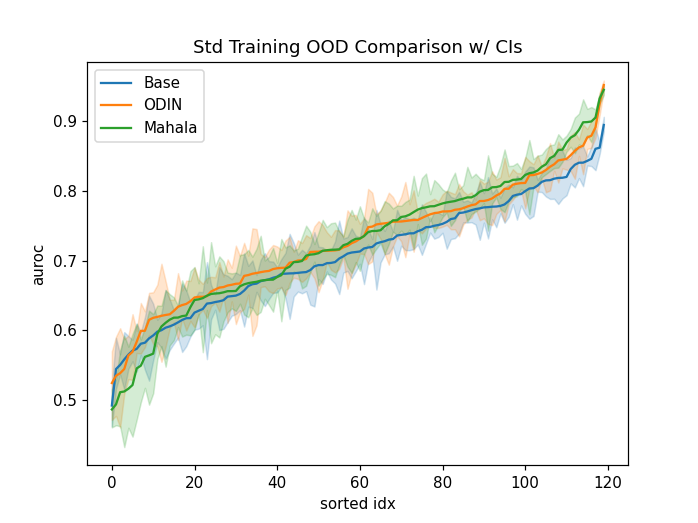

In [16]:
sns.lineplot(data=auroc_base_sorted_df, x = 'sorted idx', y='auroc')
sns.lineplot(data=auroc_odin_sorted_df, x = 'sorted idx', y='auroc')
sns.lineplot(data=auroc_mahala_sorted_df, x = 'sorted idx', y='auroc')
plt.legend(["Base","ODIN","Mahala"])
plt.title("Std Training OOD Comparison w/ CIs")
plt.show()

<IPython.core.display.Javascript object>


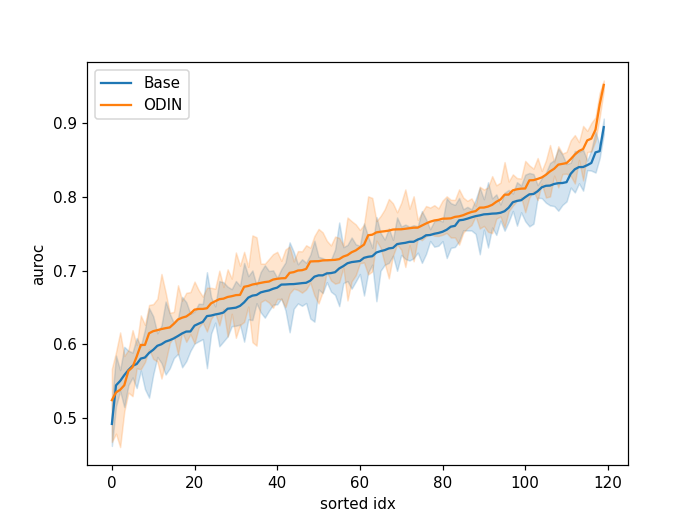

In [17]:
sns.lineplot(data=auroc_base_sorted_df, x = 'sorted idx', y='auroc')
sns.lineplot(data=auroc_odin_sorted_df, x = 'sorted idx', y='auroc')
plt.legend(["Base","ODIN"])
plt.show()

In [18]:
auroc_odinipp_means = np.array([np.array(ood_stats[i]['odin_ipp']['holdout']['auroc']).mean() for i in ood_stats])
auroc_odinipp_np = np.empty((0, len(ood_stats[0]['odin_ipp']['holdout']['auroc'])))
for idx in ood_stats:
    temp = np.array([ood_stats[idx]['odin_ipp']['holdout']['auroc']])
    auroc_odinipp_np = np.concatenate((auroc_odinipp_np, temp), axis=0)

In [19]:
# Compare idxs to odin sorted idxs
auroc_odinipp_idxs = []
for ipp_grp in holdout_groups:
    for i, sorted_idx in enumerate(auroc_odin_idxs):
        if (holdout_groups[sorted_idx] ==  ipp_grp):
            auroc_odinipp_idxs.append(i)
            print(sorted_idx)
            break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


<IPython.core.display.Javascript object>


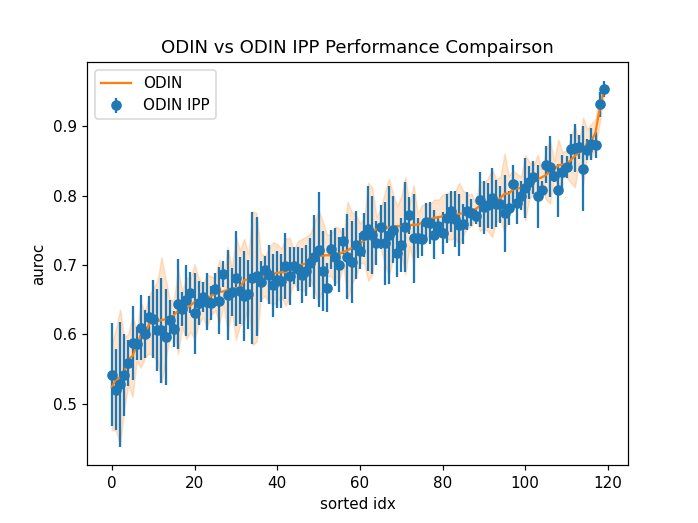

Text(0.5, 1.0, 'ODIN vs ODIN IPP Performance Compairson')

In [20]:
fig, ax_orig = plt.subplots()
plt.errorbar(auroc_odinipp_idxs, auroc_odinipp_np.mean(1), yerr=auroc_odinipp_np.std(1), fmt='o', label="ODIN IPP")
sns.lineplot(data=auroc_odin_sorted_df, x = 'sorted idx', y='auroc', ax=ax_orig, ci='sd', label='ODIN')
# sns.pointplot(data=adv_auroc_odin_sorted_df, x = 'sorted idx', y='auroc', ax=ax2, join=False)
# plt.legend(["ODIN", "AdvOE ODIN"])
plt.show()
plt.title("ODIN vs ODIN IPP Performance Compairson")

<IPython.core.display.Javascript object>


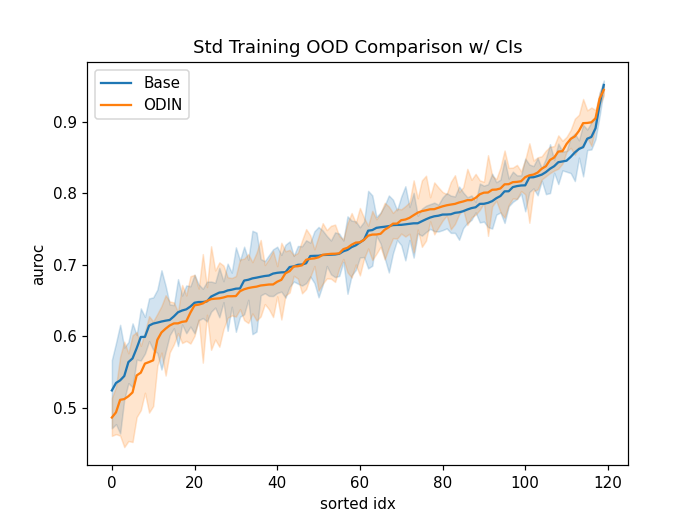

In [21]:
sns.lineplot(data=auroc_odin_sorted_df, x = 'sorted idx', y='auroc')
sns.lineplot(data=auroc_mahala_sorted_df, x = 'sorted idx', y='auroc')
plt.legend(["Base","ODIN"])
plt.title("Std Training OOD Comparison w/ CIs")
plt.show()

In [22]:
adv_auroc_odin_means = np.array([np.array(adv_ood_stats[i]['odin']['holdout']['auroc']).mean() for i in adv_ood_stats])
adv_auroc_odin_np = np.empty((0, len(adv_ood_stats[0]['odin']['holdout']['auroc'])))
for idx in adv_ood_stats:
    temp = np.array([adv_ood_stats[idx]['odin']['holdout']['auroc']])
    adv_auroc_odin_np = np.concatenate((adv_auroc_odin_np, temp), axis=0)

In [23]:
# Compare idxs to odin sorted idxs
adv_auroc_odin_idxs = []
for adv_grp in adv_holdout_groups:
    for i, sorted_idx in enumerate(auroc_odin_idxs):
        if (holdout_groups[sorted_idx] ==  adv_grp):
            adv_auroc_odin_idxs.append(i)
            print(sorted_idx)
            break

81
116
38
30
64
90
42
60
59
106
95
118
96
39
11
61
7
53
50
63
0
1
2
3
4
5
6
8
9
10
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
40
41
43
44
45
46
47
48
49
51
52
54
55
56
57
58
62
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
82
83
84
85
86
87
88
89
91
92
93
94
97
98
99
100
101
102
103
104
105
107
108
109
110
111
112
113
114
115
117
119


In [24]:
adv_auroc_odin_sorted_pd = pd.DataFrame(adv_auroc_odin_np, index=adv_auroc_odin_idxs).stack()
adv_auroc_odin_sorted_pd.index.set_names(['sorted idx', 'iter'], inplace = True)
adv_auroc_odin_sorted_pd.rename('auroc', inplace=True)
adv_auroc_odin_sorted_df = pd.DataFrame(adv_auroc_odin_sorted_pd).reset_index()
adv_auroc_odin_sorted_df_pivot = adv_auroc_odin_sorted_df.pivot('iter', 'sorted idx','auroc')

In [25]:
ohom_auroc_odin_means = np.array([np.array(ohom_ood_stats[i]['odin']['holdout']['auroc']).mean() for i in ohom_ood_stats])
ohom_auroc_odin_stds = np.array([np.array(ohom_ood_stats[i]['odin']['holdout']['auroc']).std() for i in ohom_ood_stats])
# ohom_auroc_odin_np = np.empty((0, len(ohom_ood_stats[0]['odin']['holdout']['auroc'])))
# for idx in ohom_ood_stats:
#     temp = np.array([ohom_ood_stats[idx]['odin']['holdout']['auroc']])
#     ohom_auroc_odin_np = np.concatenate((ohom_auroc_odin_np, temp), axis=0)

In [26]:
# Compare idxs to odin sorted idxs
ohom_auroc_odin_idxs = []
for ohom_grp in ohom_holdout_groups:
    for i, sorted_idx in enumerate(auroc_odin_idxs):
        if (holdout_groups[sorted_idx] ==  ohom_grp):
            ohom_auroc_odin_idxs.append(i)
            print(sorted_idx)
            break

81
116
38
30
64
90
82
46
49
24
14
45


In [27]:
display(ohom_auroc_odin_idxs)
display(ohom_auroc_odin_means)
display(ohom_auroc_odin_stds)

[0, 3, 60, 56, 117, 118, 40, 55, 71, 95, 18, 23]

array([0.71712291, 0.83641225, 0.66533985, 0.79869375, 0.67141793,
       0.96198019, 0.63583424, 0.63615716, 0.70245523, 0.75483945,
       0.68319559, 0.71377117])

array([0.01277253, 0.00949446, 0.03298141, 0.0103159 , 0.04468803,
       0.00381038, 0.03469739, 0.02280311, 0.03064527, 0.0640072 ,
       0.07126952, 0.02162805])

In [28]:
adv_auroc_odin_means_gp3dp3 = np.array([np.array(adv_ood_stats_gp3dp3[i]['odin']['holdout']['auroc']).mean() for i in adv_ood_stats_gp3dp3])
adv_auroc_odin_np_gp3dp3 = np.empty((0, len(adv_ood_stats_gp3dp3[0]['odin']['holdout']['auroc'])))
for idx in adv_ood_stats_gp3dp3:
    temp = np.array([adv_ood_stats_gp3dp3[idx]['odin']['holdout']['auroc']])
    adv_auroc_odin_np_gp3dp3 = np.concatenate((adv_auroc_odin_np_gp3dp3, temp), axis=0)
# Compare idxs to odin sorted idxs
adv_auroc_odin_idxs_gp3dp3 = []
for adv_grp in adv_holdout_groups_gp3dp3:
    for i, sorted_idx in enumerate(auroc_odin_idxs):
        if (holdout_groups[sorted_idx] ==  adv_grp):
            adv_auroc_odin_idxs_gp3dp3.append(i)
            print(sorted_idx)
            break
adv_auroc_odin_sorted_pd_gp3dp3 = pd.DataFrame(adv_auroc_odin_np_gp3dp3, index=adv_auroc_odin_idxs_gp3dp3).stack()
adv_auroc_odin_sorted_pd_gp3dp3.index.set_names(['sorted idx', 'iter'], inplace = True)
adv_auroc_odin_sorted_pd_gp3dp3.rename('auroc', inplace=True)
adv_auroc_odin_sorted_df_gp3dp3 = pd.DataFrame(adv_auroc_odin_sorted_pd_gp3dp3).reset_index()
adv_auroc_odin_sorted_df_pivot_gp3dp3 = adv_auroc_odin_sorted_df_gp3dp3.pivot('iter', 'sorted idx','auroc')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [29]:
adv_auroc_odin_means_gp3dp3

array([0.62117511, 0.75675507, 0.76477288, 0.83868294, 0.76107231,
       0.73034274, 0.70004912, 0.74359838, 0.70291372, 0.69431728,
       0.78466359, 0.75814974, 0.6608879 , 0.65398544, 0.70695835])

In [29]:
adv_auroc_odin_means_gp3dp3


array([0.62117511, 0.75675507, 0.76477288, 0.83868294, 0.76107231,
       0.73034274, 0.70004912, 0.74359838, 0.70291372, 0.69431728,
       0.78466359, 0.75814974, 0.6608879 , 0.65398544, 0.70695835,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

<IPython.core.display.Javascript object>


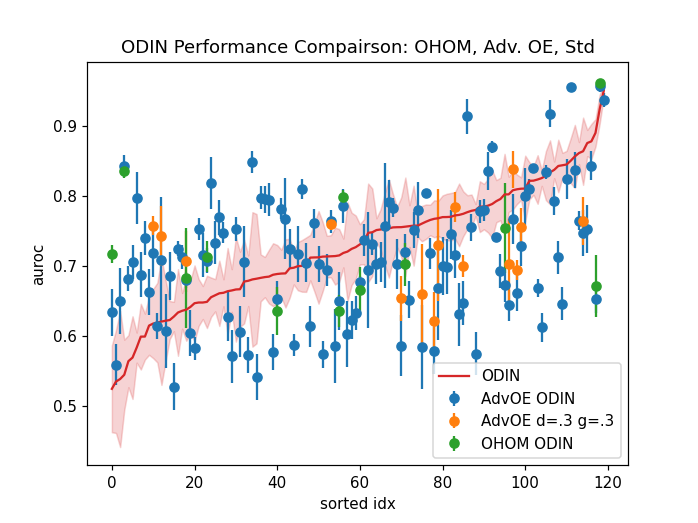

Text(0.5, 1.0, 'ODIN Performance Compairson: OHOM, Adv. OE, Std')

In [30]:
fig, ax_orig = plt.subplots()
plt.errorbar(adv_auroc_odin_idxs, adv_auroc_odin_np.mean(1), yerr=adv_auroc_odin_np.std(1), fmt='o', label="AdvOE ODIN")
plt.errorbar(adv_auroc_odin_idxs_gp3dp3, adv_auroc_odin_np_gp3dp3.mean(1), yerr=adv_auroc_odin_np_gp3dp3.std(1), fmt='o', label="AdvOE d=.3 g=.3")
plt.errorbar(ohom_auroc_odin_idxs, ohom_auroc_odin_means, yerr=ohom_auroc_odin_stds, fmt='o', label="OHOM ODIN")
sns.lineplot(data=auroc_odin_sorted_df, x = 'sorted idx', y='auroc', ax=ax_orig, ci='sd', label='ODIN')
# sns.pointplot(data=adv_auroc_odin_sorted_df, x = 'sorted idx', y='auroc', ax=ax2, join=False)
# plt.legend(["ODIN", "AdvOE ODIN"])
plt.show()
plt.title("ODIN Performance Compairson: OHOM, Adv. OE, Std")

In [40]:
adv_auroc_odin_np = np.empty((0, len(adv_ood_stats[0]['odin']['holdout']['auroc'])))
for idx in adv_ood_stats:
    temp = np.array([adv_ood_stats[idx]['odin']['holdout']['auroc']])
    adv_auroc_odin_np = np.concatenate((adv_auroc_odin_np, temp), axis=0)
adv_auroc_odin_means = adv_auroc_odin_np.mean(1)
adv_auroc_odin_idxs = adv_auroc_odin_means.argsort()
adv_auroc_odin_sorted_pd = pd.DataFrame(adv_auroc_odin_np[adv_auroc_odin_idxs]).stack()
adv_auroc_odin_sorted_pd.index.set_names(['sorted idx', 'iter'], inplace = True)
adv_auroc_odin_sorted_pd.rename('auroc', inplace=True)
adv_auroc_odin_sorted_df = pd.DataFrame(adv_auroc_odin_sorted_pd).reset_index()
adv_auroc_odin_sorted_df_pivot = adv_auroc_odin_sorted_df.pivot('sorted idx', 'iter', 'auroc')

<IPython.core.display.Javascript object>


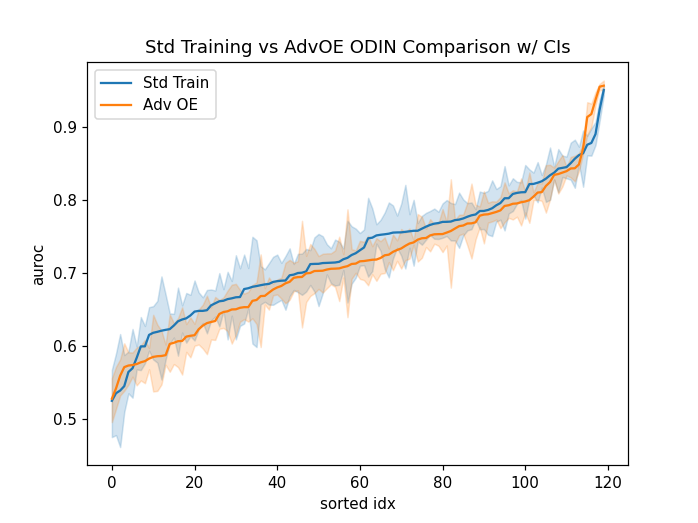

In [42]:
sns.lineplot(data=auroc_odin_sorted_df, x = 'sorted idx', y='auroc')
sns.lineplot(data=adv_auroc_odin_sorted_df, x = 'sorted idx', y='auroc')
plt.legend(["Std Train","Adv OE"])
plt.title("Std Training vs AdvOE ODIN Comparison w/ CIs")
plt.show()

<IPython.core.display.Javascript object>


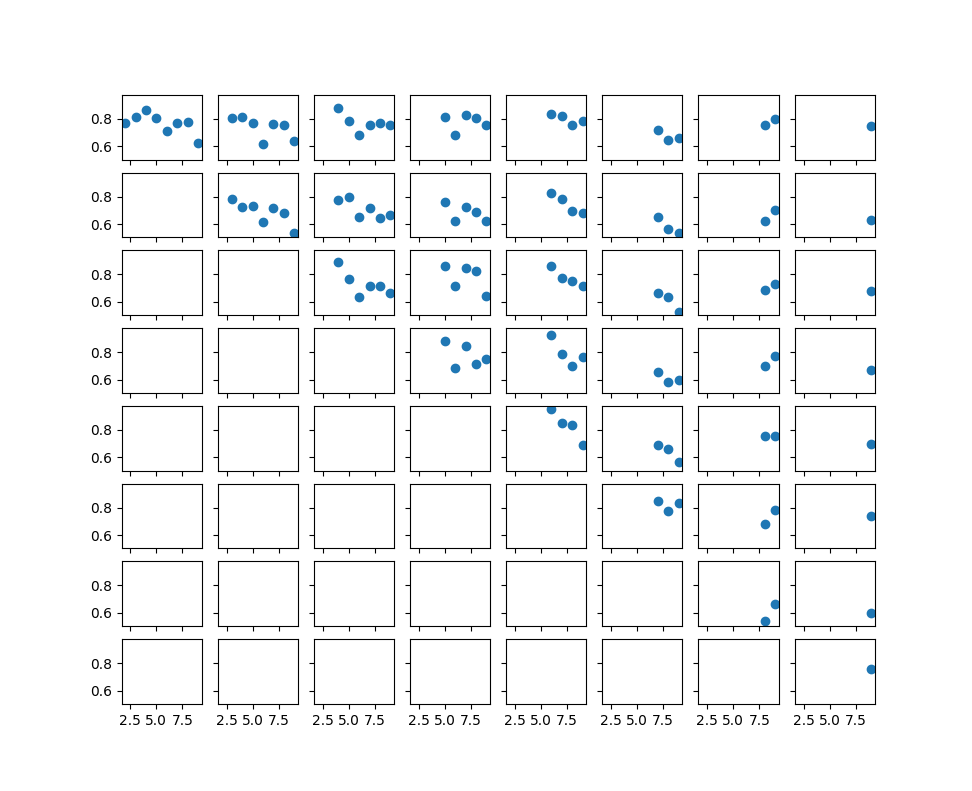

In [27]:
# Create two subplots and unpack the output array immediately
fig, axs = plt.subplots(8,8, sharex='all', sharey='all')
for i in range(10):
    for j in range(10):
        if not np.isnan(auroc_grp[i,j]).all():
            axs[i,j-1].scatter(range(10), auroc_grp[i,j])

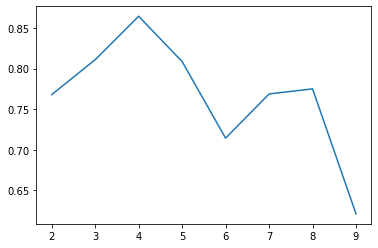

In [131]:

fig = plt.figure()
# plt.scatter(x, yacc)
# plt.scatter(x, ybase)
plt.plot(x, yodin)
# plt.scatter(x, ymahala)
# plt.scatter(x, yodinipp)
# plt.scatter(x, ymahalaipp)

In [79]:
print('Hard Group 1: {}'.format(holdout_groups[66]))
print('Hard Group 2: {}'.format(holdout_groups[115]))
print('Easy Group 1: {}'.format(holdout_groups[0]))
print('Easy Group 2: {}'.format(holdout_groups[35]))
print('Medium Group 1: {}'.format(holdout_groups[87]))
print('Medium Group 2: {}'.format(holdout_groups[47]))

Hard Group 1: (2, 3, 6)
Hard Group 2: (5, 8, 9)
Easy Group 1: (0, 1, 2)
Easy Group 2: (0, 8, 9)
Medium Group 1: (3, 4, 7)
Medium Group 2: (1, 3, 8)


In [121]:
holdout_groups

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 9),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 2, 8),
 (1, 2, 9),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 3, 7),
 (1, 3, 8),
 (1, 3, 9),
 (1, 4, 5),
 (1, 4, 6),
 (1, 4, 7),
 (1, 4, 8),
 (1, 4, 9),
 (1, 5, 6),
 (1, 5, 7),
 (1, 5, 8),
 (1, 5, 9),
 (1, 6, 7),
 (1, 6, 8),
 (1, 6, 9),
 (1, 7, 8),
 (1, 7, 9),
 (1, 8, 9),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 3, 7),
 (2, 3, 8),
 (2, 3, 9),
 (2, 4, 5),
 (2, 4, 6),
 (2, 4, 7),
 (2, 4, 8),
 (2, 4, 9),
 (2, 5, 6),
 (2, 5, 7),
 (2, 5, 8),
 (2, 5, 9),
 (2, 6, 7),
 (2, 6, 8),
 (2, 6, 9),
 (2, 7, 8),
 (2,